In [20]:
!pip install seaborn

2\. Download the file "multidim_corr.csv" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/".
This file contains several columns of data. Plot pairwise scatter plots as well as separated histograms. Compute the correlation matrix. What can you say about the dependencies between the data columns?

In [3]:
!head -10 data/skewed_data_1d.txt

0.838565365007352
1.438713164802732
2.0404600753718443
2.1655466183876633
2.2094155669268427
2.288200150691864
1.6414323742183272
1.6156743321612466
1.4163149253397493
2.215127532292156


In [22]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
print(stats.skew(np.loadtxt("data/skewed_data_1d.txt")))
print(stats.kurtosis(np.loadtxt("data/skewed_data_1d.txt")))

-0.12254922873944109
-1.0547091447817905


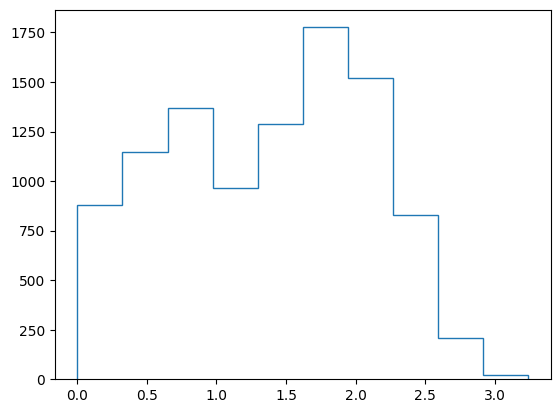

In [24]:
a = np.histogram(np.loadtxt("data/skewed_data_1d.txt"), bins=10, range=None, density=None, weights=None)
counts, bins = np.histogram(np.loadtxt("data/skewed_data_1d.txt"))
plt.stairs(counts, bins)

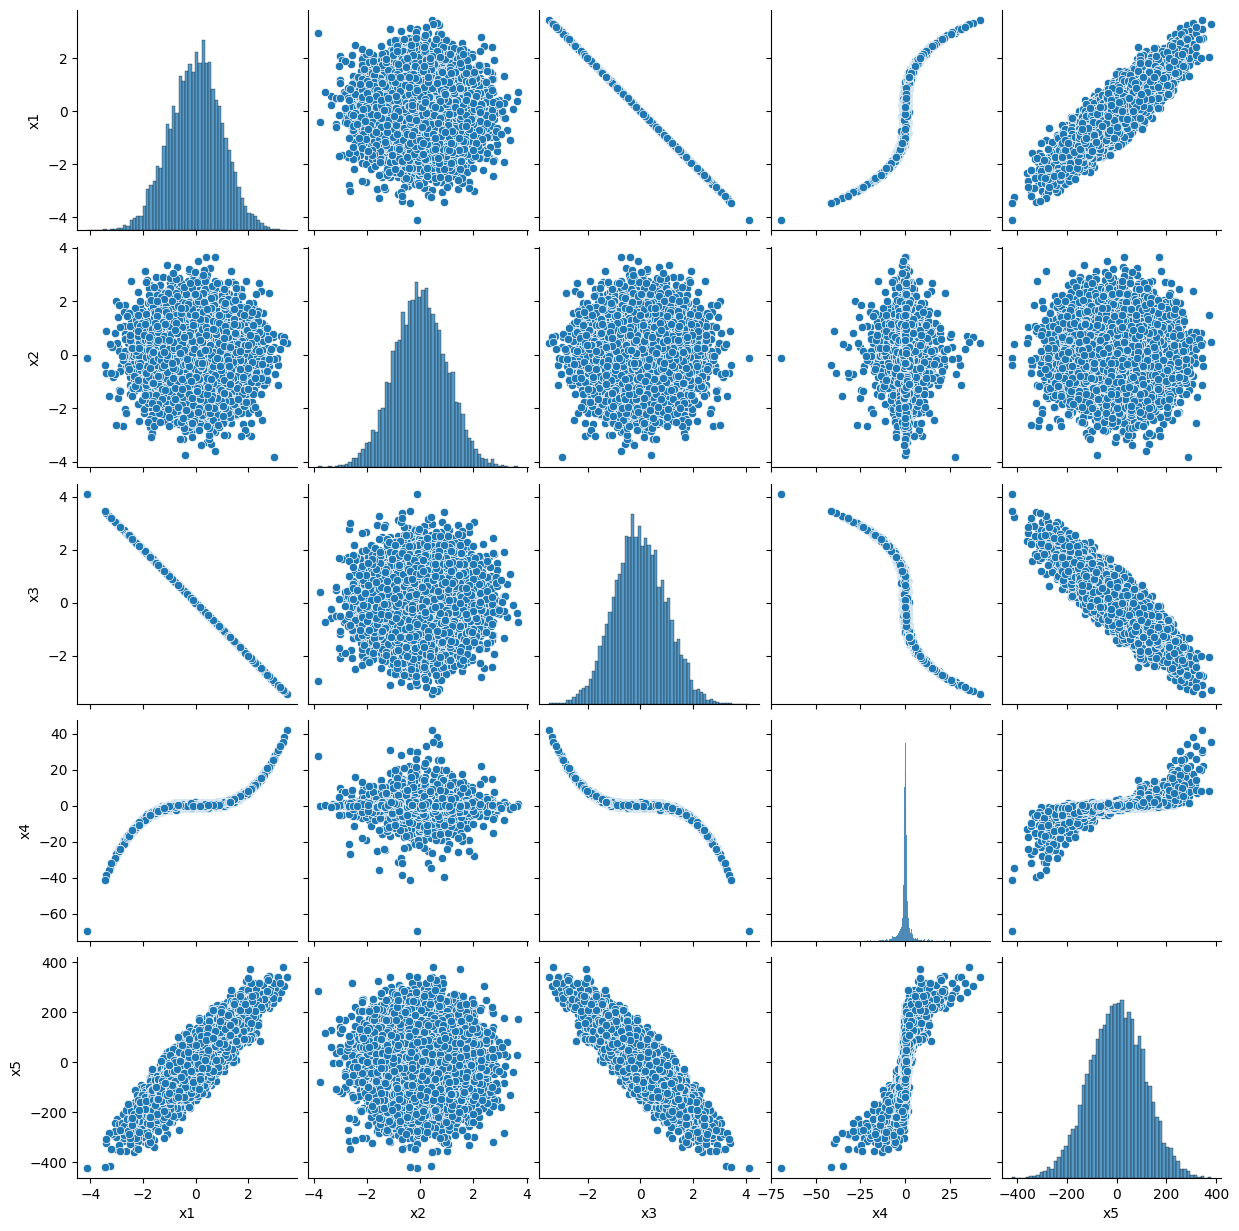

In [25]:
df = pd.read_csv('data/multidim_corr.csv')

sns.pairplot(df)

<Axes: >

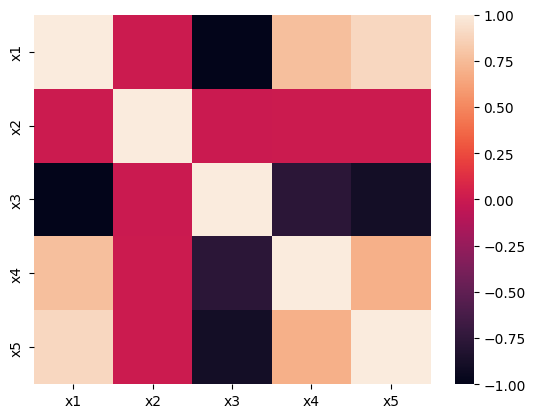

In [26]:
matrix = df.corr()
sns.heatmap(matrix)

5. In this exercise you will take two verses of the song 'Mary had a little lamb' below and write the program that uses a regular expression to find all words that go right after the name 'Mary'. For example the first such word is 'had'

In [27]:
import re

In [28]:
txt4 = """Anglo-Saxon Chronicle, chronological account of events in Anglo-Saxon and Norman 
England, a compilation of seven surviving interrelated manuscript records that is the primary 
source for the early history of England. The narrative was first assembled in the reign of 
King Alfred (871–899) from materials that included some epitome of universal history: the 
Venerable Bede’s Historia ecclesiastica gentis Anglorum, genealogies, regnal and episcopal lists, 
a few northern annals, and probably some sets of earlier West Saxon annals. The compiler also had 
access to a set of Frankish annals for the late 9th century. Soon after the year 890 several 
manuscripts were being circulated; one was available to Asser in 893, another, which appears 
to have gone no further than that year, to the late 10th-century chronicler Aethelweard, while 
one version, which eventually reached the north and which is best represented by the surviving 
E version, stopped in 892.
"""

txt5 = """Mary had a little lamb,
Little lamb, little lamb,
Mary had a little lamb
Whose fleece was white as snow.

And everywhere that Mary went,
Mary went, Mary went,
Everywhere that Mary went
The lamb was sure to go.
"""

In [29]:
rg4 = re.compile(r"\b[A-Z].*?\b")
rg5 = re.compile(r"Mary\\?\s(\w+)")

print(rg4.findall(txt4))
print(rg5.findall(txt5))

['Anglo', 'Saxon', 'Chronicle', 'Anglo', 'Saxon', 'Norman', 'England', 'England', 'The', 'King', 'Alfred', 'Venerable', 'Bede', 'Historia', 'Anglorum', 'West', 'Saxon', 'The', 'Frankish', 'Soon', 'Asser', 'Aethelweard', 'E']
['had', 'had', 'went', 'went', 'went', 'went']


8. Download the file "happiness_score.csv" from the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/". Rescale its column 'Happiness Score'. Transform its column 'Region' into one-hot representation. Compute pairwise distances using 'Happiness Score' and one-hot columns for 'Region'. Find two most similar countries.

In [33]:
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

In [34]:
def rescale(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

In [36]:
data = pd.read_csv("data/rescale.csv")
data = rescale(data)
pw_dist = np.array(pairwise_distances(data))
pw_dist

array([[0.        , 1.31768498, 1.90157843, ..., 2.6017297 , 1.37694862,
        2.46893681],
       [1.31768498, 0.        , 1.54153002, ..., 2.44320703, 1.82460842,
        2.16259532],
       [1.90157843, 1.54153002, 0.        , ..., 2.51072392, 1.94264232,
        1.33327563],
       ...,
       [2.6017297 , 2.44320703, 2.51072392, ..., 0.        , 1.40363382,
        1.53616336],
       [1.37694862, 1.82460842, 1.94264232, ..., 1.40363382, 0.        ,
        1.70847792],
       [2.46893681, 2.16259532, 1.33327563, ..., 1.53616336, 1.70847792,
        0.        ]])

In [40]:
data = pd.read_csv("data/happiness_score.csv")
data['Happiness Score'] = (data['Happiness Score'] - np.mean(data['Happiness Score'], axis=0)) / np.std(data['Happiness Score'], axis=0)
data

,Country,Region,Happiness Score
0,Denmark,Western Europe,1.883792
1,Switzerland,Western Europe,1.868854
2,Iceland,Western Europe,1.861824
3,Norway,Western Europe,1.859188
4,Finland,Western Europe,1.784498
...,...,...,...
152,Benin,Sub-Saharan Africa,-1.667954
153,Afghanistan,Southern Asia,-1.776914
154,Togo,Sub-Saharan Africa,-1.827001
155,Syria,Middle East and Northern Africa,-2.032619


In [41]:
one_hot = pd.get_dummies(data['Country'])
data = data.drop(['Country', 'Region'],axis = 1)
data = data.join(one_hot)
pd.DataFrame(pairwise_distances(data))

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,0.000000,1.414292,1.414384,1.414428,1.417695,1.418271,1.423728,1.424242,1.426545,1.429210,...,3.651333,3.674840,3.710555,3.722745,3.797650,3.822944,3.924381,3.971144,4.163925,4.299746
1,1.414292,0.000000,1.414231,1.414247,1.416727,1.417220,1.422081,1.422549,1.424662,1.427128,...,3.637566,3.661057,3.696749,3.708931,3.783790,3.809070,3.910451,3.957188,4.149878,4.285642
2,1.414384,1.414231,0.000000,1.414216,1.416326,1.416780,1.421360,1.421807,1.423829,1.426202,...,3.631090,3.654574,3.690255,3.702433,3.777271,3.802543,3.903898,3.950624,4.143270,4.279007
3,1.414428,1.414247,1.414216,0.000000,1.416185,1.416624,1.421098,1.421537,1.423526,1.425863,...,3.628662,3.652143,3.687820,3.699997,3.774827,3.800096,3.901441,3.948163,4.140792,4.276519
4,1.417695,1.416727,1.416326,1.416185,0.000000,1.414236,1.415708,1.415916,1.416941,1.418271,...,3.559997,3.583397,3.618954,3.631090,3.705682,3.730874,3.831926,3.878520,4.070673,4.206103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.822944,3.809070,3.802543,3.800096,3.730874,3.723557,3.670785,3.666731,3.649713,3.631899,...,1.426316,1.423227,1.419403,1.418338,1.414476,0.000000,1.418405,1.423129,1.460473,1.502947
153,3.924381,3.910451,3.903898,3.901441,3.831926,3.824577,3.771568,3.767495,3.750398,3.732501,...,1.444525,1.439548,1.432830,1.430771,1.420757,1.418405,0.000000,1.415100,1.437145,1.469643
154,3.971144,3.957188,3.950624,3.948163,3.878520,3.871158,3.818046,3.813965,3.796834,3.778900,...,1.455558,1.449739,1.441726,1.439221,1.426430,1.423129,1.415100,0.000000,1.429083,1.456815
155,4.163925,4.149878,4.143270,4.140792,4.070673,4.063258,4.009762,4.005651,3.988392,3.970323,...,1.517425,1.508375,1.495368,1.491137,1.467511,1.460473,1.437145,1.429083,0.000000,1.421537
